# Classification

In [1]:
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from matplotlib import pyplot as plt

## 1. Loading Data

In [2]:
DATA_DIR = os.path.join('data', 'archive', 'v_2')
BATCH_SIZE = 20
TIMES = 20
image_exts = ['png']
terrains = os.listdir(DATA_DIR)
n_classes = len(terrains)

data = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    batch_size=BATCH_SIZE,
)

data = data.map(lambda images, labels: (images/255, labels))

Found 16000 files belonging to 4 classes.


## 2. Preprocessing Data

In [4]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

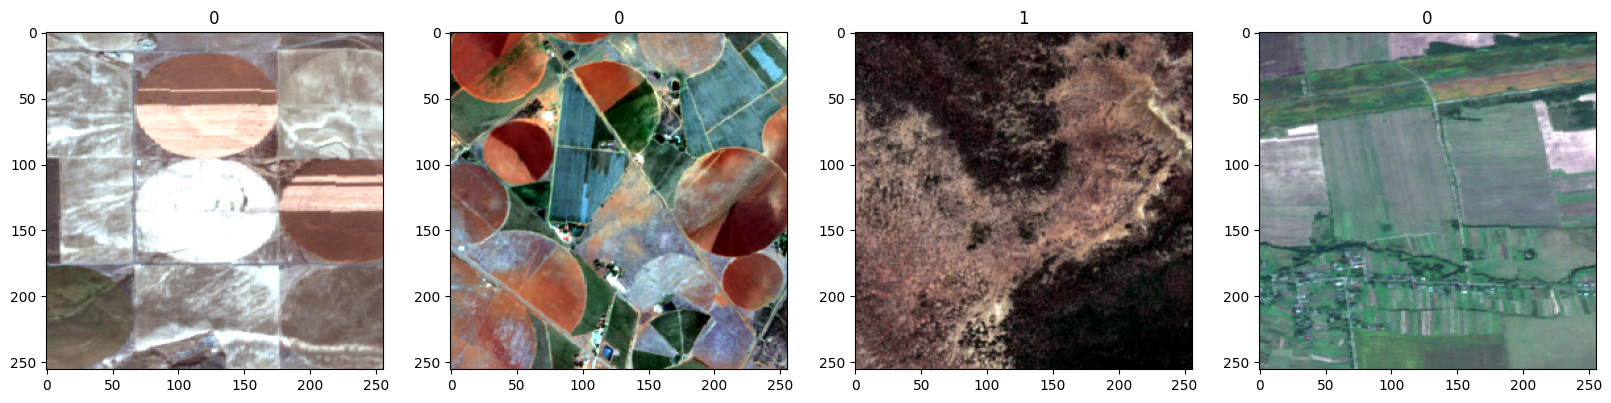

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 3. Deep Neural Network

In [6]:
train_size = int(len(data)*.7)
validation_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

train = data.take(train_size)
validation = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

In [7]:
model = Sequential()

# adding layers

#                                                                         3 rgb channels
model.add(Conv2D(32, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

# model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(Dense(n_classes, activation='sigmoid'))
model.add(Dense(n_classes, activation='softmax'))

# compile the model
model.compile('adam',
              #   loss=tf.losses.BinaryCrossentropy(),
              loss=tf.losses.SparseCategoricalCrossentropy(
                  from_logits=False),
              metrics=['accuracy'])

C:\Users\Naman\Desktop\Repos\sar\model\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,715,364 (14.17 MB)

 Trainable params: 3,715,364 (14.17 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
LOG_DIR = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_DIR)
hist = model.fit(train,
                 epochs=TIMES,
                 validation_data=validation,
                 callbacks=[tensorboard_callback]
                 )

Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 166s 295ms/step - accuracy: 0.7559 - loss: 0.6410 - val_accuracy: 0.9180 - val_loss: 0.1979
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 158s 282ms/step - accuracy: 0.9358 - loss: 0.1948 - val_accuracy: 0.9407 - val_loss: 0.1674
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 159s 283ms/step - accuracy: 0.9569 - loss: 0.1325 - val_accuracy: 0.9205 - val_loss: 0.2341
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 158s 281ms/step - accuracy: 0.9774 - loss: 0.0725 - val_accuracy: 0.9714 - val_loss: 0.0880
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 157s 279ms/step - accuracy: 0.9865 - loss: 0.0374 - val_accuracy: 0.9543 - val_loss: 0.1242
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 156s 279ms/step - accuracy: 0.9846 - loss: 0.0469 - val_accuracy: 0.9547 - val_loss: 0.1303
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 157s 280ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9702 - val_loss: 0.1044
Epoch 8/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 156s 279ms/step - accuracy: 0.9947 -

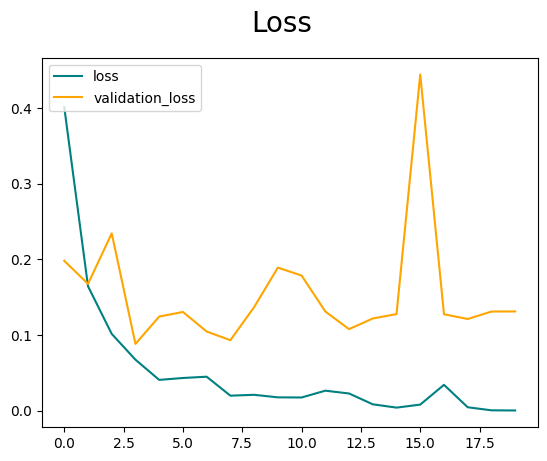

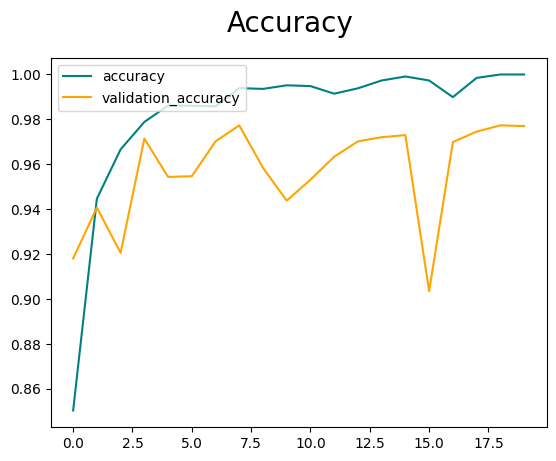

In [10]:
# loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

# accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'],
         color='orange', label='validation_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [11]:
MODEL_FILE_PATH = 'classification.keras'
if os.path.exists(MODEL_FILE_PATH):
    os.remove(MODEL_FILE_PATH)
model.save(MODEL_FILE_PATH)